## Class object mlclusters with simulated data

### 1. Import libraries

In [1]:
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics

### 2. Run class object mlclusters

In [2]:
class Mlclusters:
    
    def __init__(self, ddrad, n_cluster):
        
        self.ddrad = ddrad
        self.n_cluster = n_cluster
        self.kmeans_labels = self._fit_kmeans
        self.evaluate_performance = self._evaluate_performance
        self.plot_kmeans = self._plot_kmeans
         

    # private functions
    def _fit_kmeans(self):
        """
        Fit a clustering method Kmeans
        """  
        kmeans_model = KMeans(self.n_cluster, random_state=1).fit(self.ddrad)
        labels = kmeans_model.labels_
        return labels
    
        
    def _evaluate_performance(self):
        """
        Evaluate clustering performace using Silhouette Coefficient and Calinski-Harabaz Index
        """  
        s_score = metrics.silhouette_score((self.ddrad), self.kmeans_labels(), metric='euclidean')
        ch_score = metrics.calinski_harabaz_score((self.ddrad), self.kmeans_labels())

        return pd.Series(
            {"Silhouette Coefficient": s_score,
             "Calinski-Harabaz Index": ch_score,
            })
    
    
    def _plot_kmeans(self):
        """
        Creating a visual plot
        """  

        # Compute clustering with KMeans

        k_means = KMeans(self.n_cluster, init='k-means++', n_init=10)
        k_means.fit(self.ddrad)

        # The following bandwidth can be automatically detected using

        labels = k_means.labels_
        cluster_centers = k_means.cluster_centers_

        labels_unique = np.unique(labels)
        n_clusters_ = len(labels_unique)

        # Plot result
        plt.figure(1)
        plt.clf() # Clear the current figure.

        colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
        for k, col in zip(range(n_clusters_), colors):
            my_members = labels == k
            cluster_center = cluster_centers[k]
            plt.plot(self.ddrad[my_members, 0], self.ddrad[my_members, 1], col + '.')
            plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()   
    
        # public function


### 3. Generate dataset with structures

In [3]:
nsnps = 5000

# generate a data set with structure
pop1 = np.random.binomial(1, 0.5, (1, nsnps))
pop2 = np.random.binomial(1, 0.5, (1, nsnps))
pop3 = np.random.binomial(1, 0.5, (1, nsnps))

#make three population and each samples from  numpy array
data = np.concatenate([
    np.repeat(pop1, 5, axis=0),   #repead pop1 5 times in y axis 
    np.repeat(pop2, 5, axis=0),
    np.repeat(pop3, 5, axis=0),
])    

targety = np.concatenate([
    np.repeat(1, 5),   #repead pop1 5 times in y axis 
    np.repeat(2, 5),
    np.repeat(3, 5),
]) 

### 4. Create a class object
This class object takes two arguments, 1) dataset, and 2) cluster number.

In [4]:
fish = Mlclusters(data, 3)

### 5. Return kmeans labels

In [5]:
fish.kmeans_labels()

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

### 6. Return a Silhouette Coefficient score

In [6]:
metrics.silhouette_score((fish.ddrad), fish.kmeans_labels(), metric='euclidean')

1.0

### 7. Return a summary of performance evaluations

In [7]:
fish.evaluate_performance()

Calinski-Harabaz Index    1.0
Silhouette Coefficient    1.0
dtype: float64

### 8. Plot 

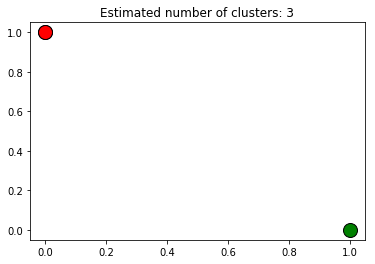

In [8]:
fish.plot_kmeans()